# Data Exploration - For Interesting Features Pt.2

Lets explore the dataset some more to create a more broad set of features.

In [1]:
import pandas as pd
from IPython.display import display

# Load the dataset
trainingSet = pd.read_csv("../data/X_train.csv")
display(trainingSet)

,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time
0,205743,5.596350e+15,fraud_Berge LLC,gas_transport,72.18,Joseph,Moody,M,5901 Foster Pine,Kenner,...,68211,"Engineer, petroleum",23/04/1941,5223f3d810e0083482e47a5c3a1eba94,1378023768,30.424083,-90.080958,0.0,2020-09-01,08:22:00
1,465349,4.311370e+18,"fraud_Eichmann, Bogan and Rodriguez",gas_transport,36.66,Phillip,Delacruz,M,26678 Lisa Locks Apt. 904,Iliff,...,648,Community arts worker,21/09/1969,25f3a9b8613a9745c5802031bd3a2c62,1386834132,39.871664,-103.457961,0.0,2020-12-12,07:42:00
2,17312,2.264940e+15,fraud_Ankunding-Carroll,travel,1.74,Juan,Sherman,M,5939 Garcia Forges Suite 297,San Antonio,...,1595797,Land,17/10/1995,2a6f3f7c697bc721a80078aefd68d857,1372338223,28.456118,-98.491336,0.0,2020-06-27,13:03:00
3,234968,2.224100e+15,"fraud_Schumm, Bauch and Ondricka",grocery_pos,140.99,Sheri,Thomas,F,019 Kimberly Light Apt. 039,Kings Bay,...,1293,Naval architect,11/09/1963,fcd03eb50b00fe682d8a47f3bec089a6,1379131971,31.292136,-82.002506,0.0,2020-09-14,04:12:00
4,194255,3.527540e+15,fraud_Gerlach Inc,shopping_net,1722.19,Teresa,Stein,F,2838 White Fields Apt. 473,Brunson,...,1725,Social researcher,05/12/1974,d3105e269285b69b334e99433d6a6585,1377711655,33.067620,-80.201090,0.0,2020-08-28,17:40:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486249,502355,4.292900e+18,fraud_Wilkinson PLC,kids_pets,4.30,Jeffrey,Smith,M,135 Joseph Mountains,Sula,...,218,"Therapist, horticultural",16/08/1995,7e6011097067231cf9178de050f4dd4c,1387546102,46.332036,-114.660338,0.0,2020-12-20,13:28:00
486250,527890,2.131570e+14,fraud_Kuvalis Ltd,gas_transport,34.85,Adam,Santos,M,725 Jo Trace Apt. 102,Glendale,...,172817,Advertising account planner,30/07/1982,5f5926277386db598df3be7a7d5d491d,1388022446,33.229608,-118.386434,0.0,2020-12-26,01:47:00
486251,253663,6.763730e+11,"fraud_Hodkiewicz, Prohaska and Paucek",travel,9.22,Vicki,Mendoza,F,3645 Atkins Island Apt. 238,Esbon,...,242,Tourism officer,18/07/1987,04b32f0a628784474a8f48f977605c4d,1379807336,39.316927,-97.617048,0.0,2020-09-21,23:48:00
486252,33882,3.026700e+13,fraud_Kihn-Fritsch,food_dining,9.39,Sarah,Foster,F,77872 Andrea Glen Apt. 543,Ford,...,1051,Chief Operating Officer,21/11/1976,cfe6c288ba518822c1b6822515a165e1,1372807037,37.084437,-78.715023,0.0,2020-07-02,23:17:00


### At Risk states / Cities

To start I have two new features in mind:

- At risk states
- At risk Cities

For each one i want to start by plotting the number of frauds per state, cities, population and then getting the top ones to create risk scores.


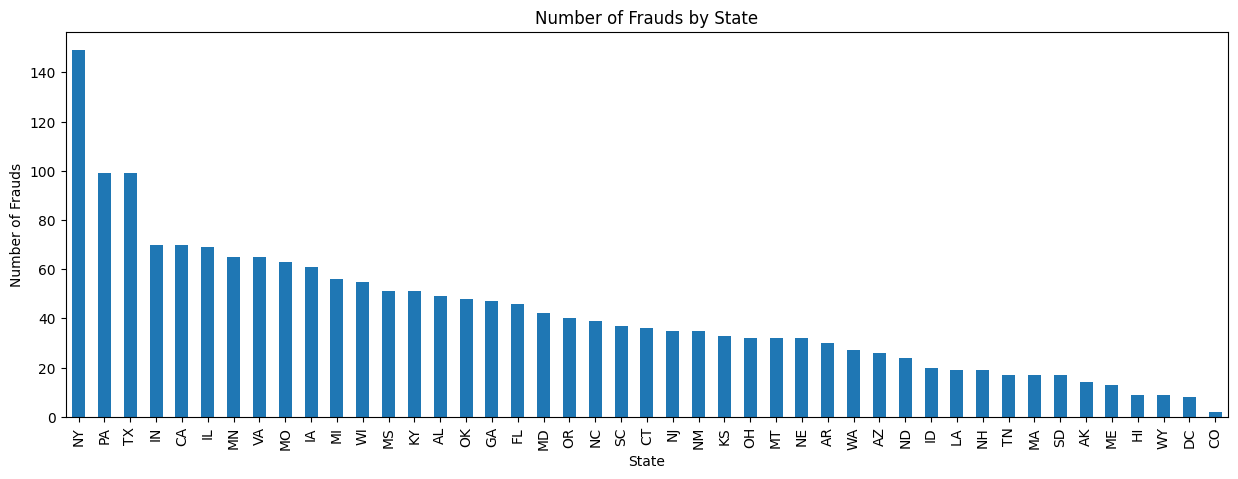

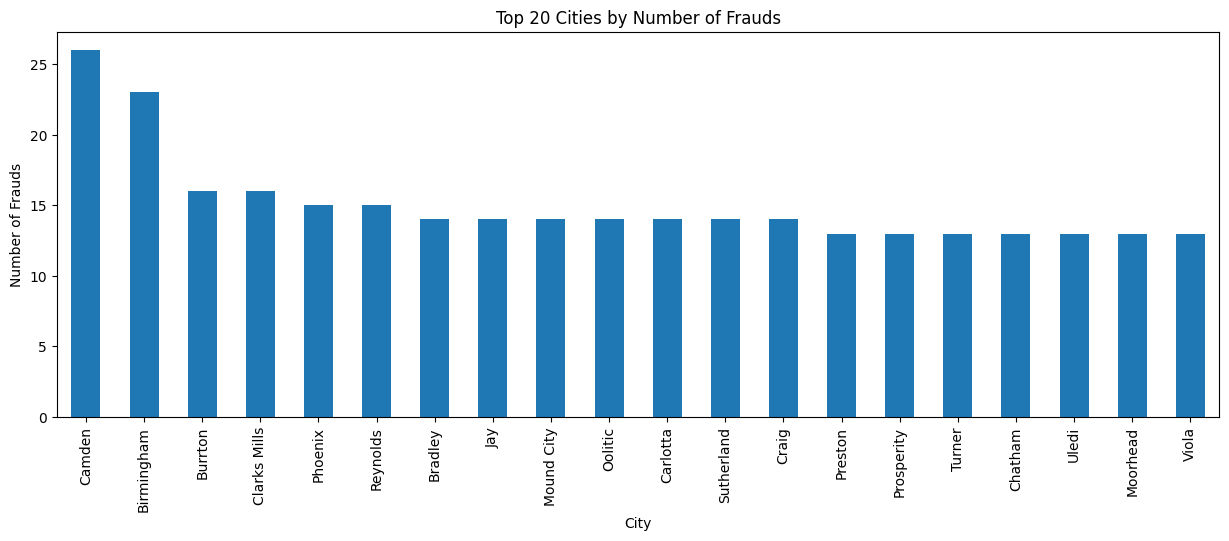

In [2]:
import matplotlib.pyplot as plt


# Calculate the number of fraudulent transactions for each state
state_fraud_count = trainingSet[trainingSet['is_fraud'] == 1].groupby('state')['is_fraud'].count().sort_values(ascending=False)

# Calculate the number of fraudulent transactions for each city
city_fraud_count = trainingSet[trainingSet['is_fraud'] == 1].groupby('city')['is_fraud'].count().sort_values(ascending=False)

# Plotting the number of frauds by state
plt.figure(figsize=(15, 5))
state_fraud_count.plot(kind='bar', title='Number of Frauds by State')
plt.xlabel('State')
plt.ylabel('Number of Frauds')
plt.show()

# Since there can be many cities, you might want to limit to top N cities for visualization
top_cities = 20
plt.figure(figsize=(15, 5))
city_fraud_count.head(top_cities).plot(kind='bar', title=f'Top {top_cities} Cities by Number of Frauds')
plt.xlabel('City')
plt.ylabel('Number of Frauds')
plt.show()

This is interesting but let me calculate the rate of fraud per population for a more normalized risk indicator:

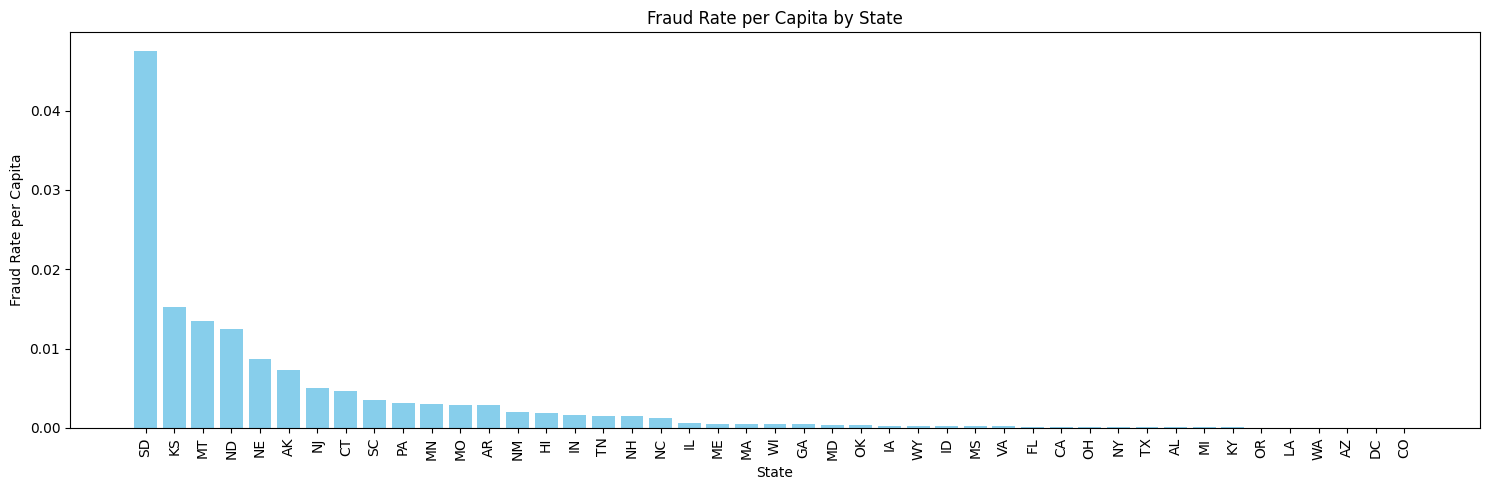

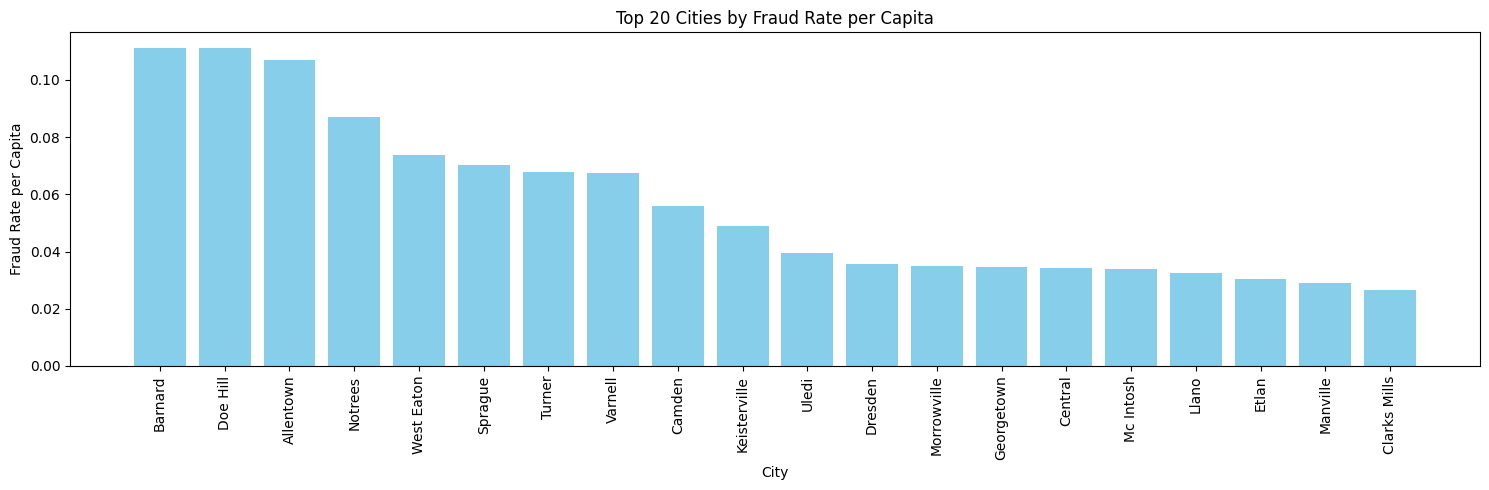

In [3]:

# Calculate the rate of fraud per capita for each state
state_fraud_rate = trainingSet[trainingSet['is_fraud'] == 1].groupby('state').apply(lambda x: x['is_fraud'].count() / x['city_pop'].unique().sum())

# Convert the series to a DataFrame for easy plotting
state_fraud_rate_df = state_fraud_rate.reset_index(name='fraud_rate')

# Sort the DataFrame by the fraud rate in descending order for better visualization
state_fraud_rate_df = state_fraud_rate_df.sort_values('fraud_rate', ascending=False)

# Plot the fraud rates by state using a bar plot
plt.figure(figsize=(15, 5))
plt.bar(state_fraud_rate_df['state'], state_fraud_rate_df['fraud_rate'], color='skyblue')
plt.title('Fraud Rate per Capita by State')
plt.xlabel('State')
plt.ylabel('Fraud Rate per Capita')
plt.xticks(rotation=90)  # Rotate the x-axis labels so they don't overlap
plt.tight_layout()  # Adjust layout so everything fits without overlapping
plt.show()

# Calculate the rate of fraud per capita for each city
city_fraud_rate = trainingSet[trainingSet['is_fraud'] == 1].groupby('city').apply(lambda x: x['is_fraud'].count() / x['city_pop'].iloc[0])

# Convert the series to a DataFrame
city_fraud_rate_df = city_fraud_rate.reset_index(name='fraud_rate')

# Sort the DataFrame by fraud rate in descending order
city_fraud_rate_df = city_fraud_rate_df.sort_values('fraud_rate', ascending=False)

# Since the number of cities might be large, we'll plot the top 20 cities for clarity
top_cities = city_fraud_rate_df.head(20)

# Plot the fraud rates by city using a bar plot
plt.figure(figsize=(15, 5))
plt.bar(top_cities['city'], top_cities['fraud_rate'], color='skyblue')
plt.title('Top 20 Cities by Fraud Rate per Capita')
plt.xlabel('City')
plt.ylabel('Fraud Rate per Capita')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


These bar charts illustrate the number of fraud cases by state and city (dark blue), and the fraud rate per capita (light blue), which is normalized by the population.

From the "Number of Frauds by State" chart, you can see the states listed in descending order of the number of frauds. The "Top 20 Cities by Number of Frauds" chart provides a similar count but focuses on the city level.

The "Fraud Rate per Capita by State" and "Top 20 Cities by Fraud Rate per Capita" charts, show the frauds normalized by the population, giving you a rate that reflects the proportion of frauds in relation to the number of people living in that area. These rates are important because they provide insight into the prevalence of fraud independent of population size—areas with smaller populations can still have a high fraud rate, which might indicate a targeted area for fraud that would not be obvious from the absolute numbers alone.

I also want to take into account that cities with very small populations can have high fraud rates due to a small number of fraud cases. This could lead to misleading representations in the plots, especially if Im only looking at the top 20. Let me try determining a min population first.

To start let me plot the distributions of populations

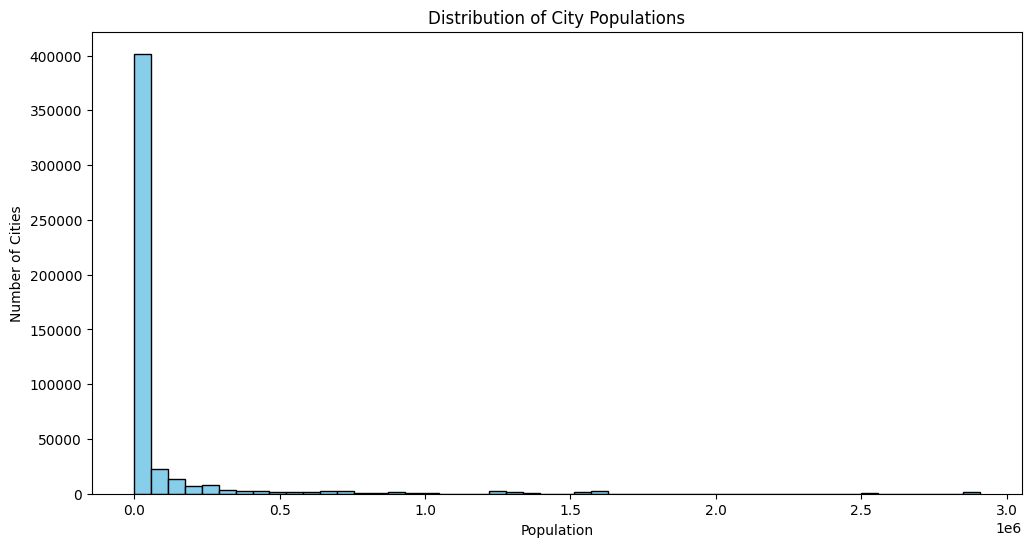

In [4]:
import matplotlib.pyplot as plt

# Assuming 'city_population' is a column in your DataFrame `trainingSet` which has the populations of cities
plt.figure(figsize=(12, 6))
plt.hist(trainingSet['city_pop'], bins=50, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Distribution of City Populations')
plt.xlabel('Population')
plt.ylabel('Number of Cities')

# Show the plot
plt.show()


The distribution of city populations shown in the histogram is highly skewed to the right, with the vast majority of cities having a small population and a few cities with very large populations. The x-axis, representing population, stretches to 3 million, but almost all cities fall into the first bar, indicating they have populations smaller than the bin width.

Given this distribution, a large number of cities have small populations which could drastically affect per capita calculations. Small populations can lead to volatility in per capita measures because even one or two fraud cases can seem significant when divided by a small number.

To avoid this volatility and get a more stable measure, I think I should set a minimum population threshold that is reasonable for the analysis. I want to include cities that are representative of the general population where fraud could be more indicative of a trend and not just an anomaly due to a small denominator.

Looking at the histogram, I might to set a threshold that excludes the first bin or two where the smallest populations reside. I could look at cities with populations of at least 10,000 or 50,000, which would still include many small to mid-sized cities but exclude the smallest ones that could skew the analysis.

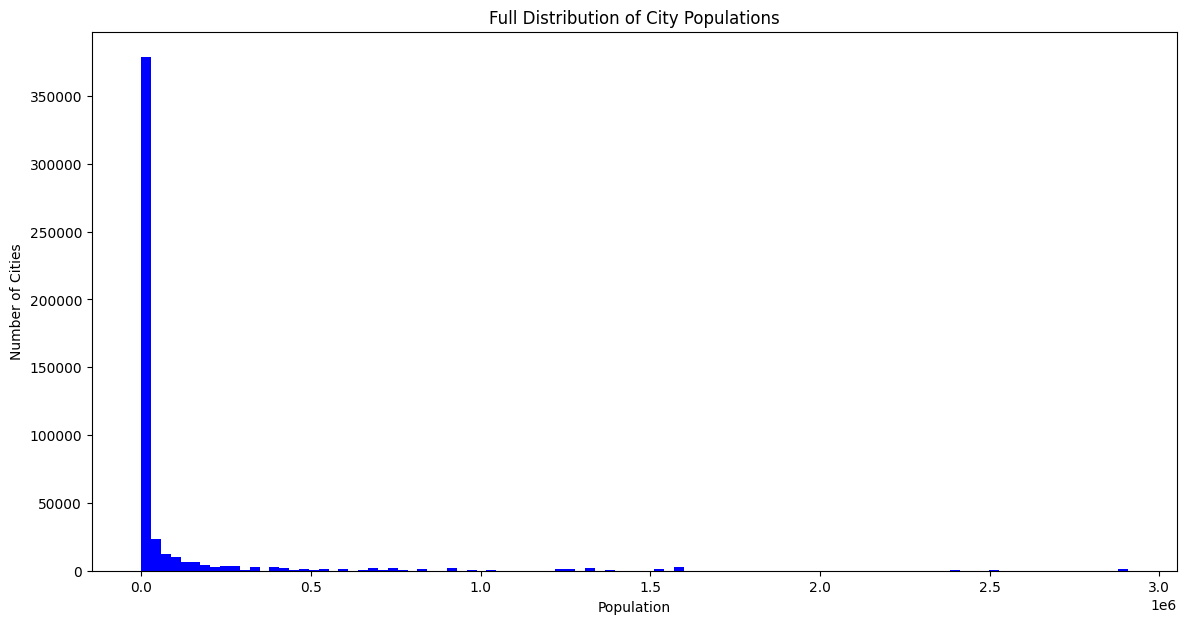

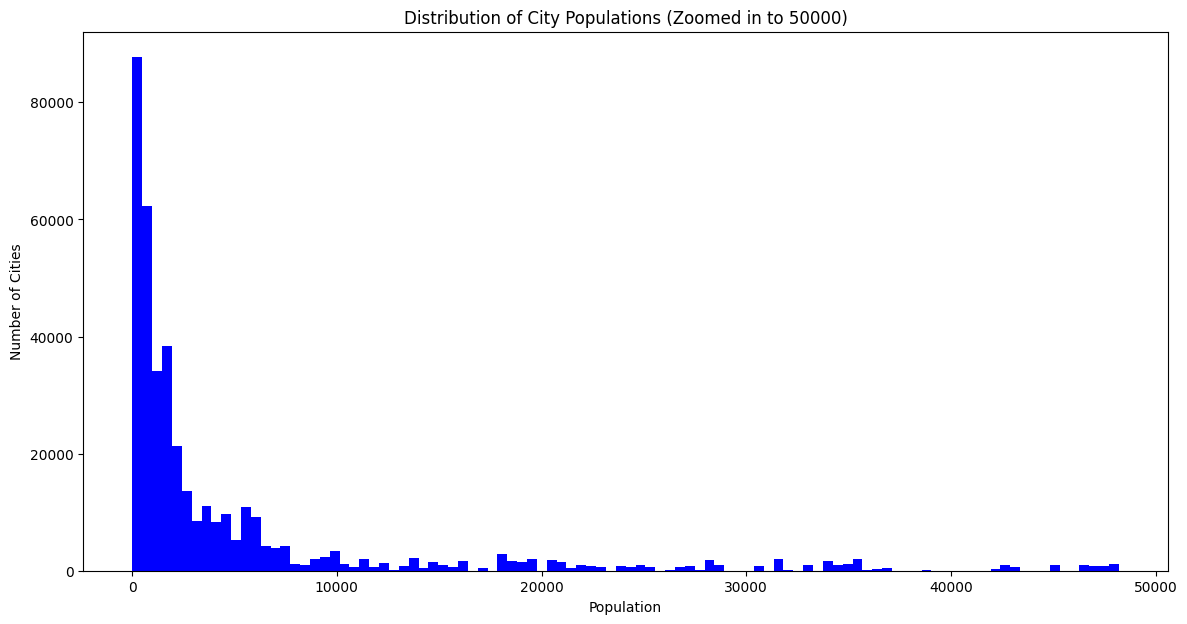

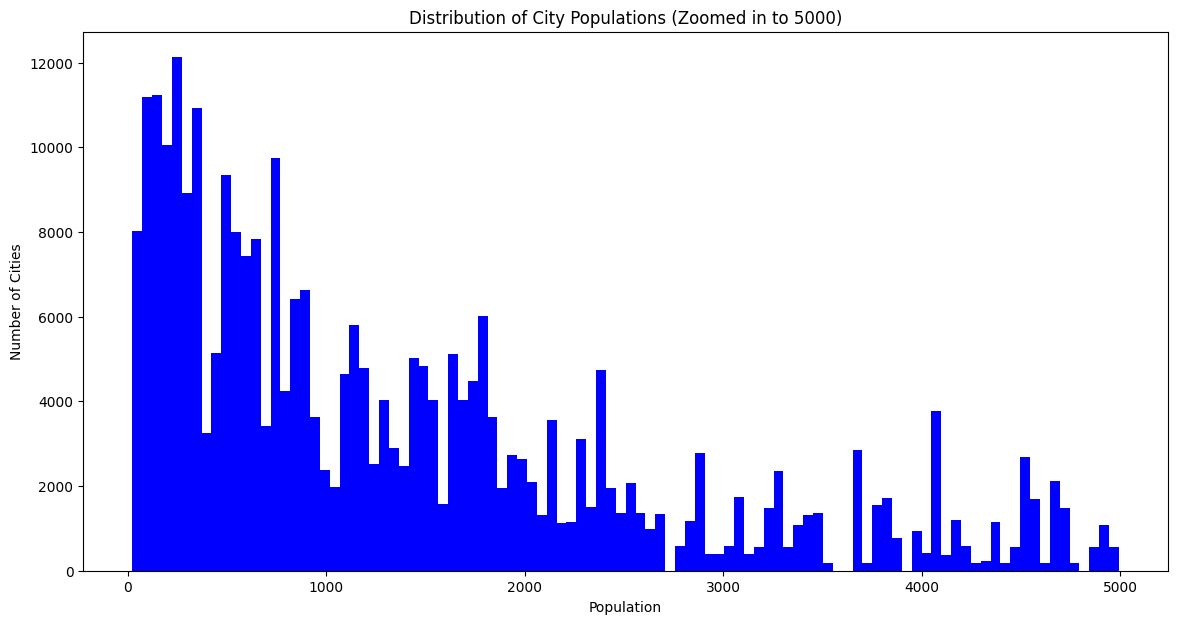

In [5]:
import numpy as np

# Sample data for city populations, replace with actual city_population column from the dataset
city_populations = trainingSet['city_pop']

# Let's see the full distribution first
plt.figure(figsize=(14, 7))
plt.hist(city_populations, bins=100, color='blue')
plt.title('Full Distribution of City Populations')
plt.xlabel('Population')
plt.ylabel('Number of Cities')
plt.show()

# Now let's zoom in to see the distribution of city populations up to a certain threshold
zoom_threshold = 50000  # example threshold to zoom into
plt.figure(figsize=(14, 7))
plt.hist(city_populations[city_populations < zoom_threshold], bins=100, color='blue')
plt.title(f'Distribution of City Populations (Zoomed in to {zoom_threshold})')
plt.xlabel('Population')
plt.ylabel('Number of Cities')
plt.show()

# Now let's zoom in to see the distribution of city populations up to a certain threshold
zoom_threshold = 5000  # example threshold to zoom into
plt.figure(figsize=(14, 7))
plt.hist(city_populations[city_populations < zoom_threshold], bins=100, color='blue')
plt.title(f'Distribution of City Populations (Zoomed in to {zoom_threshold})')
plt.xlabel('Population')
plt.ylabel('Number of Cities')
plt.show()

The goal is to analyze fraud rates in a way that's not overly influenced by the smallest populations, a threshold between 1000 and 2000 seems to strike a balance, still allowing for analysis of small cities without the extreme volatility of the smallest populations. This helps to filter out the cities represented by the tallest bars on the left side of your histogram.

Lets see what the city_fraud_rate now looks like after normalization (we will plot them both for reference):

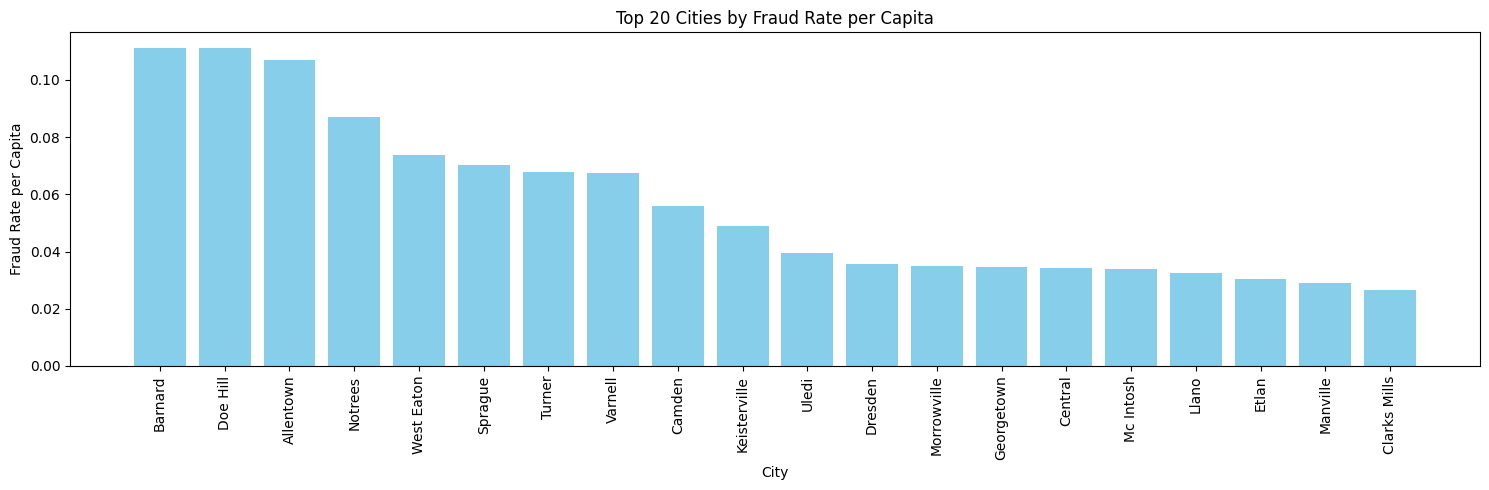

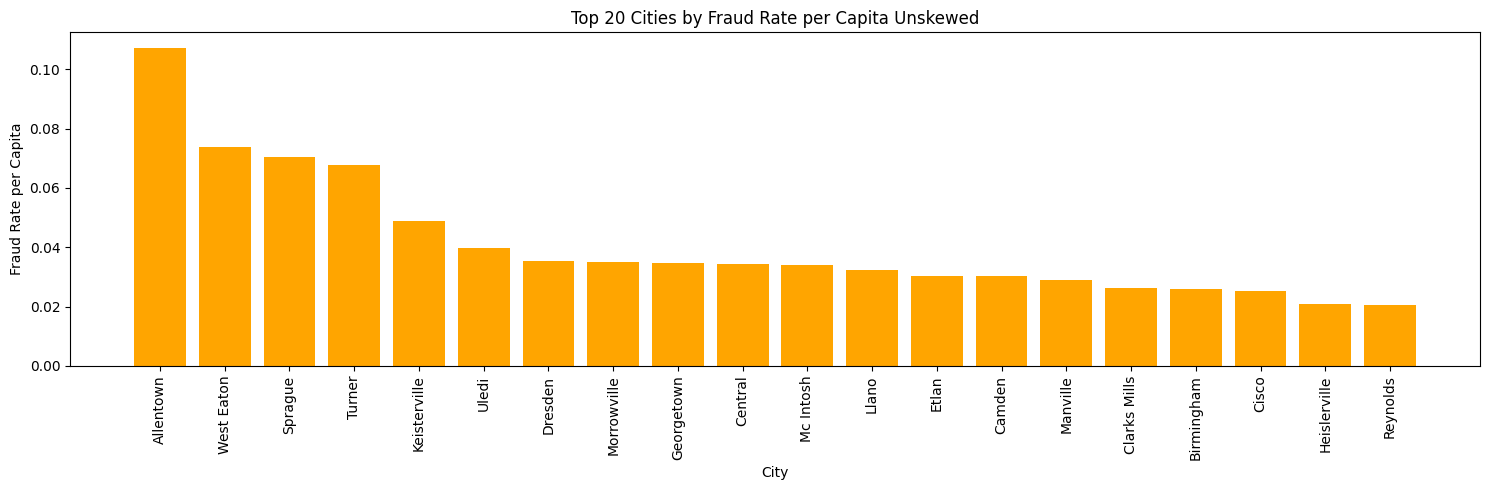

In [6]:
# Old Plot
# Plot the fraud rates by city using a bar plot
plt.figure(figsize=(15, 5))
plt.bar(top_cities['city'], top_cities['fraud_rate'], color='skyblue')
plt.title('Top 20 Cities by Fraud Rate per Capita')
plt.xlabel('City')
plt.ylabel('Fraud Rate per Capita')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# New Plot
# Define your minimum population threshold
min_population_threshold = 100

# Calculate the rate of fraud per capita for each city, but only for those above the minimum population threshold
city_fraud_rate_skew_reduced = trainingSet[(trainingSet['is_fraud'] == 1) & (trainingSet['city_pop'] >= min_population_threshold)].groupby('city').apply(lambda x: x['is_fraud'].count() / x['city_pop'].iloc[0])

# Convert the series to a DataFrame
city_fraud_rate_df_unskewed = city_fraud_rate_skew_reduced.reset_index(name='fraud_rate')

# Sort the DataFrame by fraud rate in descending order
city_fraud_rate_df_unskewed = city_fraud_rate_df_unskewed.sort_values('fraud_rate', ascending=False)

# Since the number of cities might be large, we'll plot the top 20 cities for clarity
top_cities_unskewed = city_fraud_rate_df_unskewed.head(20)

# Plot the fraud rates by city using a bar plot
plt.figure(figsize=(15, 5))
plt.bar(top_cities_unskewed['city'], top_cities_unskewed['fraud_rate'], color='orange')
plt.title('Top 20 Cities by Fraud Rate per Capita Unskewed')
plt.xlabel('City')
plt.ylabel('Fraud Rate per Capita')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Nows lets create a feature based on this:

- I am to create features state_risk_score and city_risk_score based on these fraud rates, which might help improve the model's predictive power. 

In [7]:

# For states
state_quartiles = state_fraud_rate.quantile([0.33, 0.66])
state_risk_score = state_fraud_rate.apply(
    lambda x: 'low' if x <= state_quartiles.iloc[0] else ('medium' if x <= state_quartiles.iloc[1] else 'high')
)

# For cities
city_quartiles = city_fraud_rate_skew_reduced.quantile([0.33, 0.66])
city_risk_score = city_fraud_rate_skew_reduced.apply(
    lambda x: 'low' if x <= city_quartiles.iloc[0] else ('medium' if x <= city_quartiles.iloc[1] else 'high')
)

# Reset index to turn series into DataFrame
state_risk_score_df = state_risk_score.reset_index(name='state_risk_score')
city_risk_score_df = city_risk_score.reset_index(name='city_risk_score')

# Then, merge these risk scores back into your original DataFrame
trainingSet = trainingSet.merge(state_risk_score.rename('state_risk_score'), left_on='state', right_index=True)
trainingSet = trainingSet.merge(city_risk_score.rename('city_risk_score'), left_on='city', right_index=True)


In [8]:
# Now, there doesnt seem to be any null values, but let's verify:
null_counts = trainingSet.isnull().sum()
print("\nNumber of null values in each column:\n", null_counts)


Number of null values in each column:
 Id                  0
cc_num              0
merchant            0
category            0
amt                 0
first               0
last                0
gender              0
street              0
city                0
state               0
zip                 0
lat                 0
long                0
city_pop            0
job                 0
dob                 0
trans_num           0
unix_time           0
merch_lat           0
merch_long          0
is_fraud            0
trans_date          0
trans_time          0
state_risk_score    0
city_risk_score     0
dtype: int64


In [9]:
display(trainingSet)

,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,state_risk_score,city_risk_score
65,304561,4.861310e+18,fraud_Kris-Padberg,shopping_pos,6.37,Ashley,Cruz,F,65417 Walsh Radial Suite 691,Saint Amant,...,16/12/1977,3e7840502a91ffbc3c13265db5b242c9,1381707206,30.455584,-90.819298,0.0,2020-10-13,23:33:00,low,low
356,388643,4.861310e+18,fraud_Ratke and Sons,health_fitness,29.85,Ashley,Cruz,F,65417 Walsh Radial Suite 691,Saint Amant,...,16/12/1977,89dc3ce6446af88cf316b8e965b34807,1384957989,29.931567,-91.484028,0.0,2020-11-20,14:33:00,low,low
632,403237,4.861310e+18,fraud_Dibbert and Sons,entertainment,169.88,Ashley,Cruz,F,65417 Walsh Radial Suite 691,Saint Amant,...,16/12/1977,b4fd0fa440f6b12e325cd4fafc93a052,1385506844,30.018933,-90.937037,0.0,2020-11-26,23:00:00,low,low
1173,460847,4.861310e+18,"fraud_Cremin, Hamill and Reichel",misc_pos,24.17,Ashley,Cruz,F,65417 Walsh Radial Suite 691,Saint Amant,...,16/12/1977,07438442d2f473c356d2efd3ce09f71a,1386726942,30.473879,-91.262462,0.0,2020-12-11,01:55:00,low,low
1861,111605,4.861310e+18,fraud_Flatley-Durgan,misc_net,1.88,Ashley,Cruz,F,65417 Walsh Radial Suite 691,Saint Amant,...,16/12/1977,2e144e94fd7dd93b4c1f7e69f3c6a966,1375144215,29.291976,-91.694367,0.0,2020-07-30,00:30:00,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396589,425405,3.588000e+15,fraud_Kutch and Sons,grocery_pos,333.42,Jason,Johnson,M,5942 Thomas Park,Craig,...,17/06/1997,e68abacbf9a321f9c0a16f2e543a98ef,1386029650,55.853802,-132.400924,1.0,2020-12-03,00:14:00,high,high
404391,425184,3.588000e+15,fraud_Goyette Inc,shopping_net,990.84,Jason,Johnson,M,5942 Thomas Park,Craig,...,17/06/1997,583bfd7df5cd966870be9f4d2101f97b,1386024435,55.480308,-133.312477,1.0,2020-12-02,22:47:00,high,high
413346,425162,3.588000e+15,fraud_Fisher-Schowalter,shopping_net,984.28,Jason,Johnson,M,5942 Thomas Park,Craig,...,17/06/1997,7a7f30f2ac59399e4d15d1d59ee5389c,1386024011,54.605711,-133.235980,1.0,2020-12-02,22:40:00,high,high
416542,425459,3.588000e+15,fraud_Schamberger-O'Keefe,grocery_pos,298.76,Jason,Johnson,M,5942 Thomas Park,Craig,...,17/06/1997,faa98e77154a17b666e2931eb639e1c3,1386030993,55.408278,-132.321002,1.0,2020-12-03,00:36:00,high,high


### Jobs Feature

Lets look into jobs by fraudulent counts.

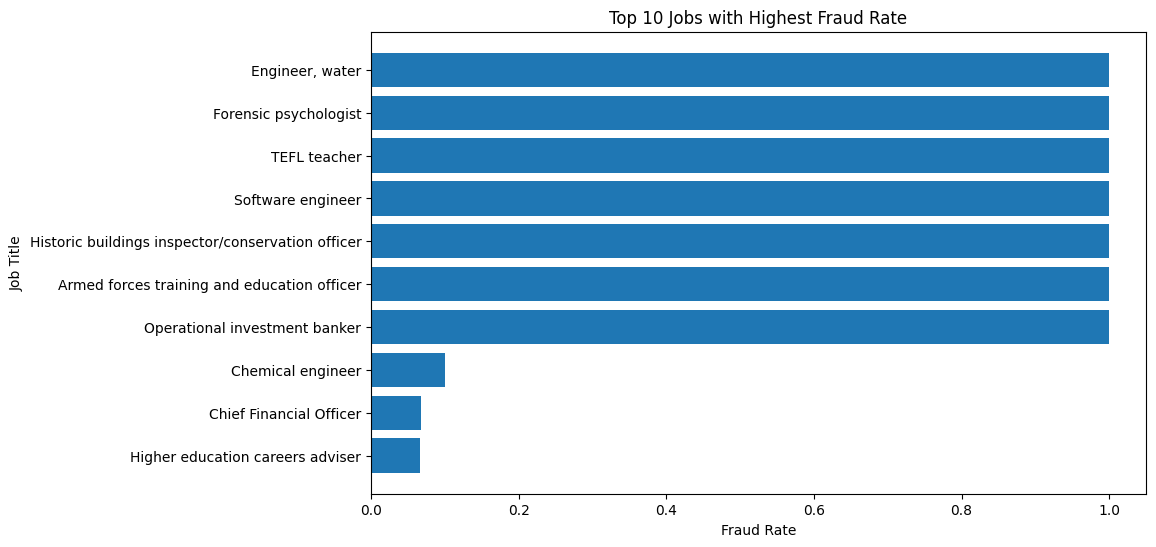

In [10]:
# Group by job title and count the number of fraud instances
job_fraud_counts = trainingSet.groupby('job')['is_fraud'].sum()

# Calculate total number of transactions per job
job_total_counts = trainingSet.groupby('job')['is_fraud'].count()

# Compute fraud rate per job title
job_fraud_rate = job_fraud_counts / job_total_counts

# Combine the counts and rates into a DataFrame
jobs_fraud_analysis = pd.DataFrame({
    'total_transactions': job_total_counts,
    'fraud_transactions': job_fraud_counts,
    'fraud_rate': job_fraud_rate
}).reset_index()

# Sort the DataFrame by the fraud rate in descending order
jobs_fraud_analysis_sorted = jobs_fraud_analysis.sort_values('fraud_rate', ascending=False)

# To get the top 10 jobs with highest fraud rate:
top_10_fraud_jobs = jobs_fraud_analysis_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_fraud_jobs['job'], top_10_fraud_jobs['fraud_rate'])
plt.xlabel('Fraud Rate')
plt.ylabel('Job Title')
plt.title('Top 10 Jobs with Highest Fraud Rate')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.show()



Most definitely getting skewed by low job counts, lets get the distribution so we can ge a minimum job count.

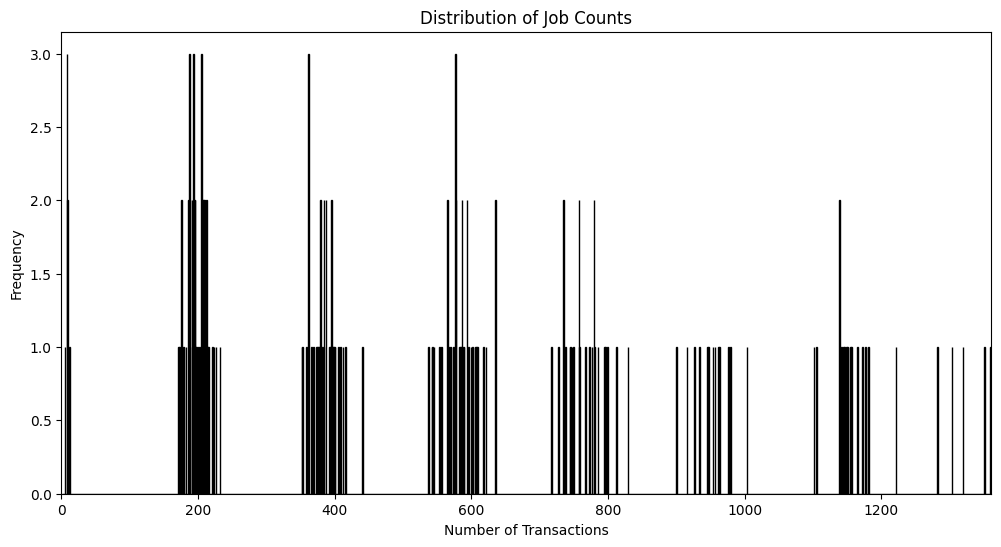

95th percentile of job counts: 1360.9499999999998


In [11]:
# Calculate total transactions for each job title
job_counts = trainingSet.groupby('job').size()

# Plot a histogram of the job counts
plt.figure(figsize=(12, 6))
plt.hist(job_counts, bins=range(1, job_counts.max()+1, 1), color='skyblue', edgecolor='black')
plt.title('Distribution of Job Counts')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.xlim(0, job_counts.quantile(0.95))  # Limiting x-axis to 95th percentile for better visualization
plt.show()

# You might also want to display the 95th percentile value
print(f"95th percentile of job counts: {job_counts.quantile(0.95)}")



The histogram shows a multi-modal distribution with 3 apparent peaks. There are a number of jobs that have low transaction counts and a few with very high transaction counts. 

Based on this histogram, it seems there's a significant drop after the first few bins, suggesting that many jobs have very few transactions associated with them. A potential threshold might be where the bars start to have significant gaps between them. There seems to be a noticeable gap after jobs with 100 transactions, which seems to be a logical threshold to minimize the effect of job titles with very few transactions skewing the fraud rate.

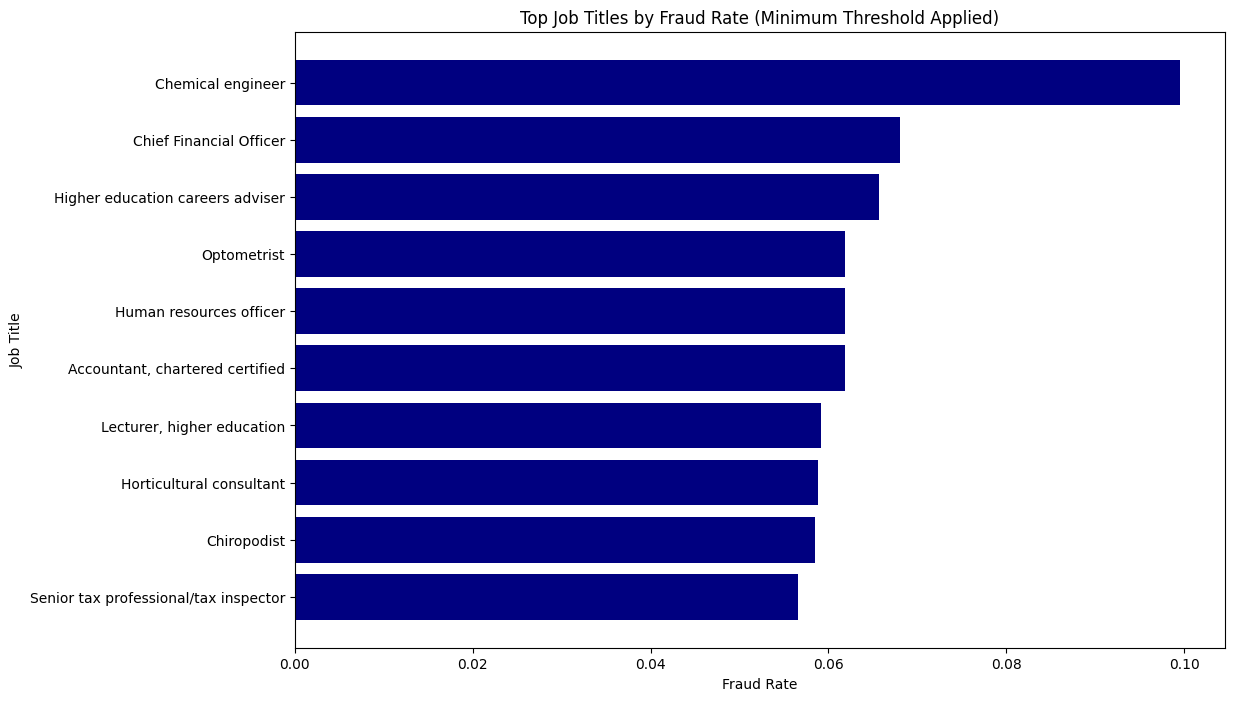

In [12]:
# Set a minimum threshold for total transactions to consider for each job
min_transactions_threshold = 125  # Or whatever number makes sense for your dataset

# Calculate total transactions and fraud transactions per job title
job_counts = trainingSet.groupby('job').agg(total_transactions=('is_fraud', 'count'),
                                            fraud_transactions=('is_fraud', 'sum')).reset_index()

# Filter out jobs that don't meet the minimum threshold
filtered_jobs = job_counts[job_counts['total_transactions'] >= min_transactions_threshold].copy()

# Calculate the fraud rate for these jobs
filtered_jobs['fraud_rate'] = filtered_jobs['fraud_transactions'] / filtered_jobs['total_transactions']

# Sort the DataFrame by the fraud rate in descending order
sorted_jobs = filtered_jobs.sort_values('fraud_rate', ascending=False)

# Plot the top job titles by fraud rate
top_job_titles = sorted_jobs.head(10)
plt.figure(figsize=(12, 8))
plt.barh(top_job_titles['job'], top_job_titles['fraud_rate'], color='navy')
plt.xlabel('Fraud Rate')
plt.ylabel('Job Title')
plt.title('Top Job Titles by Fraud Rate (Minimum Threshold Applied)')
plt.gca().invert_yaxis()  # Highest value at the top
plt.show()


Now that this is normalized we are seeing much more realistics scores, lets assign these a risk:

In [13]:
# Calculate quantiles for the fraud rate of job titles
job_fraud_quantiles = filtered_jobs['fraud_rate'].quantile([0.33, 0.66])

# Define a function to categorize jobs into risk scores based on fraud rates
def categorize_risk(fraud_rate):
    if fraud_rate <= job_fraud_quantiles.iloc[0]:
        return 'low'
    elif fraud_rate <= job_fraud_quantiles.iloc[1]:
        return 'medium'
    return 'high'

# Apply the function to create a new column 'job_risk_score'
filtered_jobs['job_risk_score'] = filtered_jobs['fraud_rate'].apply(categorize_risk)

# To merge the risk scores back into the trainingSet DataFrame, ensure the 'job' column exists in trainingSet
trainingSet = trainingSet.merge(filtered_jobs[['job', 'job_risk_score']], on='job', how='left')
trainingSet['job_risk_score'].fillna('low', inplace=True) # jobs with low counts just assigned a row risk

In [14]:
display(trainingSet)

,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,state_risk_score,city_risk_score,job_risk_score
0,304561,4.861310e+18,fraud_Kris-Padberg,shopping_pos,6.37,Ashley,Cruz,F,65417 Walsh Radial Suite 691,Saint Amant,...,3e7840502a91ffbc3c13265db5b242c9,1381707206,30.455584,-90.819298,0.0,2020-10-13,23:33:00,low,low,low
1,388643,4.861310e+18,fraud_Ratke and Sons,health_fitness,29.85,Ashley,Cruz,F,65417 Walsh Radial Suite 691,Saint Amant,...,89dc3ce6446af88cf316b8e965b34807,1384957989,29.931567,-91.484028,0.0,2020-11-20,14:33:00,low,low,low
2,403237,4.861310e+18,fraud_Dibbert and Sons,entertainment,169.88,Ashley,Cruz,F,65417 Walsh Radial Suite 691,Saint Amant,...,b4fd0fa440f6b12e325cd4fafc93a052,1385506844,30.018933,-90.937037,0.0,2020-11-26,23:00:00,low,low,low
3,460847,4.861310e+18,"fraud_Cremin, Hamill and Reichel",misc_pos,24.17,Ashley,Cruz,F,65417 Walsh Radial Suite 691,Saint Amant,...,07438442d2f473c356d2efd3ce09f71a,1386726942,30.473879,-91.262462,0.0,2020-12-11,01:55:00,low,low,low
4,111605,4.861310e+18,fraud_Flatley-Durgan,misc_net,1.88,Ashley,Cruz,F,65417 Walsh Radial Suite 691,Saint Amant,...,2e144e94fd7dd93b4c1f7e69f3c6a966,1375144215,29.291976,-91.694367,0.0,2020-07-30,00:30:00,low,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119828,425405,3.588000e+15,fraud_Kutch and Sons,grocery_pos,333.42,Jason,Johnson,M,5942 Thomas Park,Craig,...,e68abacbf9a321f9c0a16f2e543a98ef,1386029650,55.853802,-132.400924,1.0,2020-12-03,00:14:00,high,high,high
119829,425184,3.588000e+15,fraud_Goyette Inc,shopping_net,990.84,Jason,Johnson,M,5942 Thomas Park,Craig,...,583bfd7df5cd966870be9f4d2101f97b,1386024435,55.480308,-133.312477,1.0,2020-12-02,22:47:00,high,high,high
119830,425162,3.588000e+15,fraud_Fisher-Schowalter,shopping_net,984.28,Jason,Johnson,M,5942 Thomas Park,Craig,...,7a7f30f2ac59399e4d15d1d59ee5389c,1386024011,54.605711,-133.235980,1.0,2020-12-02,22:40:00,high,high,high
119831,425459,3.588000e+15,fraud_Schamberger-O'Keefe,grocery_pos,298.76,Jason,Johnson,M,5942 Thomas Park,Craig,...,faa98e77154a17b666e2931eb639e1c3,1386030993,55.408278,-132.321002,1.0,2020-12-03,00:36:00,high,high,high


### Merchant Risk

Lets take a look at the merchants to see if we can get anything useful

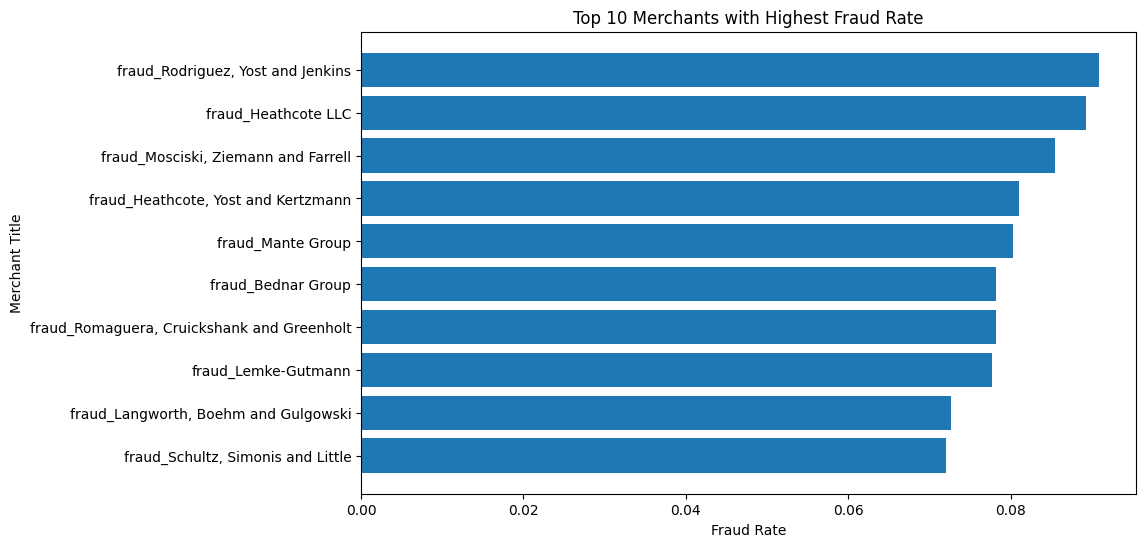

In [15]:
# Group by job title and count the number of fraud instances
merchant_fraud_counts = trainingSet.groupby('merchant')['is_fraud'].sum()

# Calculate total number of transactions per job
merchant_total_counts = trainingSet.groupby('merchant')['is_fraud'].count()

# Compute fraud rate per job title
merchant_fraud_rate = merchant_fraud_counts / merchant_total_counts

# Combine the counts and rates into a DataFrame
merchant_fraud_analysis = pd.DataFrame({
    'total_transactions': merchant_total_counts,
    'fraud_transactions': merchant_fraud_counts,
    'fraud_rate': merchant_fraud_rate
}).reset_index()

# Sort the DataFrame by the fraud rate in descending order
merchant_fraud_analysis_sorted = merchant_fraud_analysis.sort_values('fraud_rate', ascending=False)

# To get the top 10 jobs with highest fraud rate:
top_10_fraud_merchant = merchant_fraud_analysis_sorted.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_fraud_merchant['merchant'], top_10_fraud_merchant['fraud_rate'])
plt.xlabel('Fraud Rate')
plt.ylabel('Merchant Title')
plt.title('Top 10 Merchants with Highest Fraud Rate')
plt.gca().invert_yaxis()  # To display the highest value at the top
plt.show()

Again lets look at the distribution and normalize.

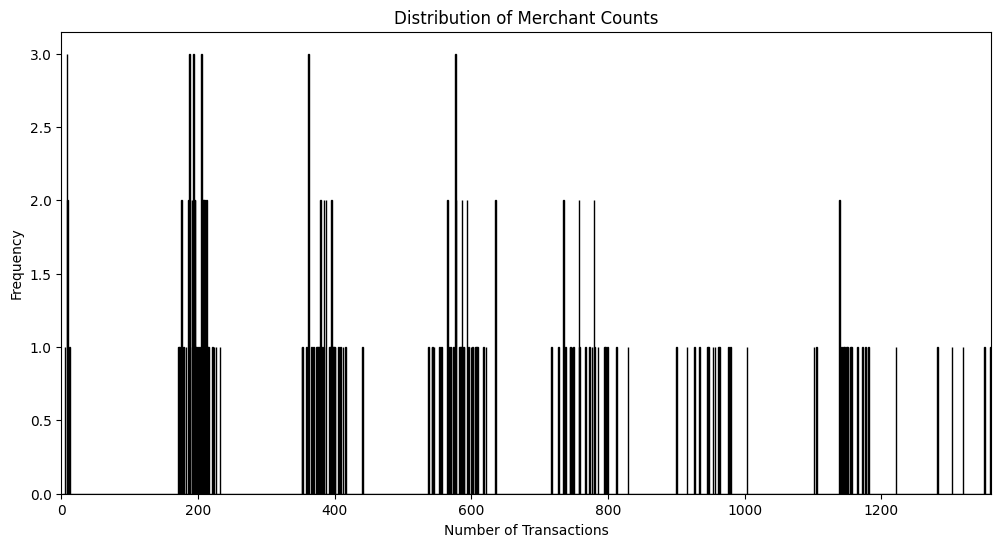

95th percentile of job counts: 1360.9499999999998


In [16]:
# Calculate total transactions for each job title
merchant_counts = trainingSet.groupby('job').size()

# Plot a histogram of the job counts
plt.figure(figsize=(12, 6))
plt.hist(merchant_counts, bins=range(1, merchant_counts.max()+1, 1), color='skyblue', edgecolor='black')
plt.title('Distribution of Merchant Counts')
plt.xlabel('Number of Transactions')
plt.ylabel('Frequency')
plt.xlim(0, merchant_counts.quantile(0.95))  # Limiting x-axis to 95th percentile for better visualization
plt.show()

# You might also want to display the 95th percentile value
print(f"95th percentile of job counts: {merchant_counts.quantile(0.95)}")

Very similar to the job counts, lets filter out the bottom few.

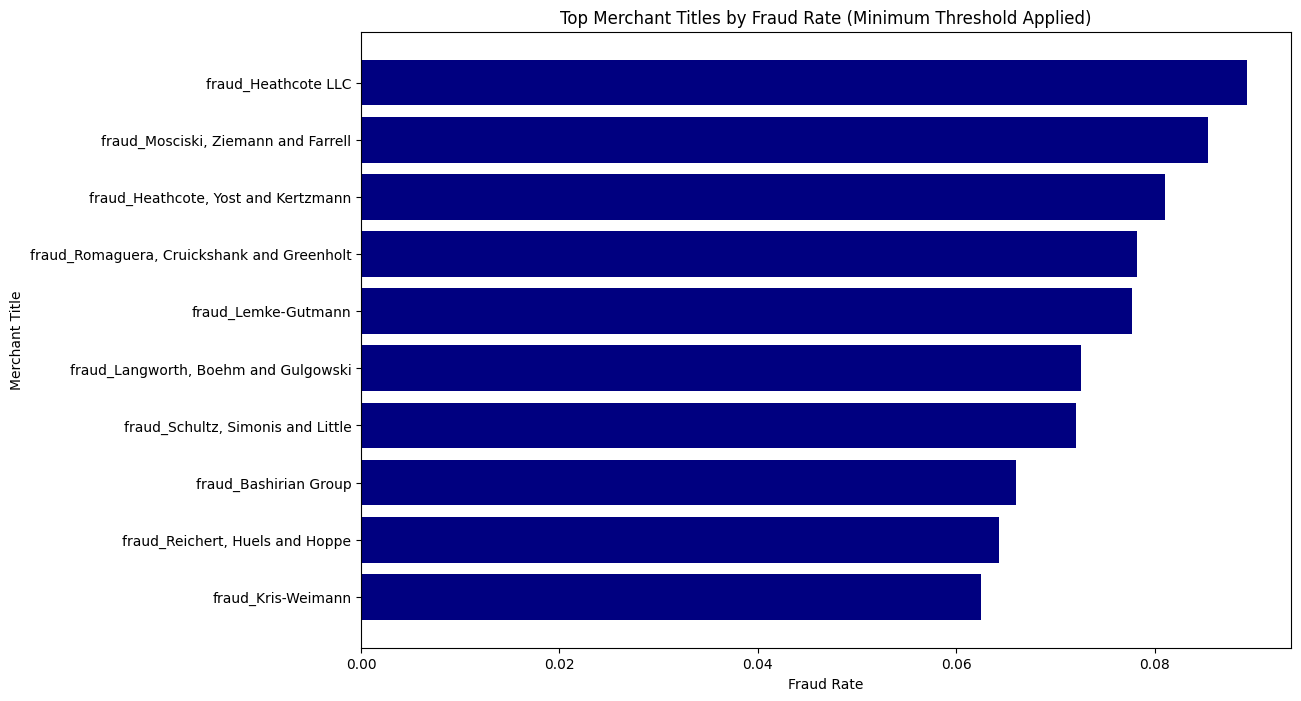

In [17]:
# Set a minimum threshold for total transactions to consider for each job
min_transactions_threshold = 125  # Or whatever number makes sense for your dataset

# Calculate total transactions and fraud transactions per job title
merchant_counts = trainingSet.groupby('merchant').agg(total_transactions=('is_fraud', 'count'),
                                            fraud_transactions=('is_fraud', 'sum')).reset_index()

# Filter out jobs that don't meet the minimum threshold
filtered_merchants = merchant_counts[merchant_counts['total_transactions'] >= min_transactions_threshold].copy()

# Calculate the fraud rate for these jobs
filtered_merchants['fraud_rate'] = filtered_merchants['fraud_transactions'] / filtered_merchants['total_transactions']

# Sort the DataFrame by the fraud rate in descending order
sorted_merchants = filtered_merchants.sort_values('fraud_rate', ascending=False)

# Plot the top job titles by fraud rate
top_merchant_titles = sorted_merchants.head(10)
plt.figure(figsize=(12, 8))
plt.barh(top_merchant_titles['merchant'], top_merchant_titles['fraud_rate'], color='navy')
plt.xlabel('Fraud Rate')
plt.ylabel('Merchant Title')
plt.title('Top Merchant Titles by Fraud Rate (Minimum Threshold Applied)')
plt.gca().invert_yaxis()  # Highest value at the top
plt.show()

Now that this is normalized we are seeing scores based on frequency, lets assign these a risk:

In [18]:
# Calculate quantiles for the fraud rate of job titles
merchant_fraud_quantiles = filtered_merchants['fraud_rate'].quantile([0.33, 0.66])

# Define a function to categorize jobs into risk scores based on fraud rates
def categorize_risk(fraud_rate):
    if fraud_rate <= merchant_fraud_quantiles.iloc[0]:
        return 'low'
    elif fraud_rate <= merchant_fraud_quantiles.iloc[1]:
        return 'medium'
    return 'high'

# Apply the function to create a new column 'job_risk_score'
filtered_merchants['merchant_risk_score'] = filtered_merchants['fraud_rate'].apply(categorize_risk)

# To merge the risk scores back into the trainingSet DataFrame, ensure the 'job' column exists in trainingSet
trainingSet = trainingSet.merge(filtered_merchants[['merchant', 'merchant_risk_score']], on='merchant', how='left')
trainingSet['merchant_risk_score'].fillna('low', inplace=True) # for jobs with low counts just assigned a row risk

In [19]:
display(trainingSet)

,Id,cc_num,merchant,category,amt,first,last,gender,street,city,...,unix_time,merch_lat,merch_long,is_fraud,trans_date,trans_time,state_risk_score,city_risk_score,job_risk_score,merchant_risk_score
0,304561,4.861310e+18,fraud_Kris-Padberg,shopping_pos,6.37,Ashley,Cruz,F,65417 Walsh Radial Suite 691,Saint Amant,...,1381707206,30.455584,-90.819298,0.0,2020-10-13,23:33:00,low,low,low,high
1,388643,4.861310e+18,fraud_Ratke and Sons,health_fitness,29.85,Ashley,Cruz,F,65417 Walsh Radial Suite 691,Saint Amant,...,1384957989,29.931567,-91.484028,0.0,2020-11-20,14:33:00,low,low,low,high
2,403237,4.861310e+18,fraud_Dibbert and Sons,entertainment,169.88,Ashley,Cruz,F,65417 Walsh Radial Suite 691,Saint Amant,...,1385506844,30.018933,-90.937037,0.0,2020-11-26,23:00:00,low,low,low,medium
3,460847,4.861310e+18,"fraud_Cremin, Hamill and Reichel",misc_pos,24.17,Ashley,Cruz,F,65417 Walsh Radial Suite 691,Saint Amant,...,1386726942,30.473879,-91.262462,0.0,2020-12-11,01:55:00,low,low,low,low
4,111605,4.861310e+18,fraud_Flatley-Durgan,misc_net,1.88,Ashley,Cruz,F,65417 Walsh Radial Suite 691,Saint Amant,...,1375144215,29.291976,-91.694367,0.0,2020-07-30,00:30:00,low,low,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119828,425405,3.588000e+15,fraud_Kutch and Sons,grocery_pos,333.42,Jason,Johnson,M,5942 Thomas Park,Craig,...,1386029650,55.853802,-132.400924,1.0,2020-12-03,00:14:00,high,high,high,high
119829,425184,3.588000e+15,fraud_Goyette Inc,shopping_net,990.84,Jason,Johnson,M,5942 Thomas Park,Craig,...,1386024435,55.480308,-133.312477,1.0,2020-12-02,22:47:00,high,high,high,high
119830,425162,3.588000e+15,fraud_Fisher-Schowalter,shopping_net,984.28,Jason,Johnson,M,5942 Thomas Park,Craig,...,1386024011,54.605711,-133.235980,1.0,2020-12-02,22:40:00,high,high,high,high
119831,425459,3.588000e+15,fraud_Schamberger-O'Keefe,grocery_pos,298.76,Jason,Johnson,M,5942 Thomas Park,Craig,...,1386030993,55.408278,-132.321002,1.0,2020-12-03,00:36:00,high,high,high,high


### Most spent Categories during Risk Hours

Let me see what the categories by hour are.

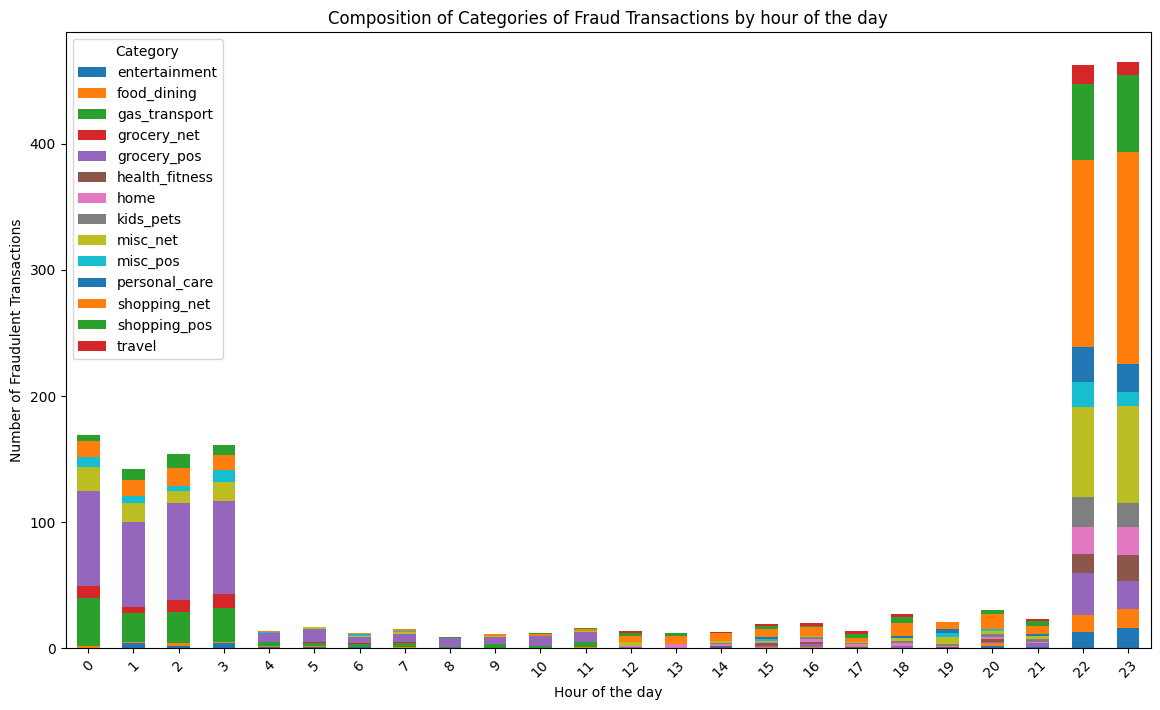

In [22]:
# fraud df
fraud_df = trainingSet[trainingSet['is_fraud'] == 1]
# Make sure the 'trans_date' and 'trans_time' are in the right datetime format
trainingSet['trans_date'] = pd.to_datetime(trainingSet['trans_date'])
trainingSet['trans_time'] = pd.to_timedelta(trainingSet['trans_time'].astype(str))

# Extract day of week and hour of day
trainingSet['day_of_week'] = trainingSet['trans_date'].dt.day_name()
trainingSet['hour_of_day'] = trainingSet['trans_time'].dt.components['hours']

# Create a pivot table
pivot_df = fraud_df.pivot_table(index='hour_of_day', columns='category', values='is_fraud', aggfunc='count', fill_value=0)
import matplotlib.colors as mcolors

# Plotting
pivot_df.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Composition of Categories of Fraud Transactions by hour of the day')
plt.xlabel('Hour of the day')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(rotation=45)  # Rotate the month names for readability
plt.legend(title='Category')
plt.show()


We can see that grocery_pos and shopping_net are more likely during at risk hours.

Okay looks like we have a solid set of features to add, lets move to a new notebook to test them on some models.